In [2]:
%matplotlib inline

In [3]:
import ts1 as ts
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels
import matplotlib.pyplot as plt

In [4]:
reload(ts)

<module 'ts1' from 'ts1.pyc'>

In [5]:
df = ts.analyze_it()

In [6]:
# First step - create the range of dates for our series

In [7]:
# converts string to datetime object in pandas:
df['issue_d_format'] = pd.to_datetime(df['issue_d'])
# dates = pd.date_range('1950-01', '2013-03', freq='M')
df['idxcopy'] = df['issue_d_format']
dfts = df.set_index('issue_d_format') 
year_month_summary = dfts.groupby(lambda x : x.year * 100 + x.month).count()
loan_count_summary = year_month_summary['issue_d']
# dfts['loan_count'] = loan_count_summary

In [8]:
dates = pd.date_range('2012-01', '2014-1', freq = 'M') # Have to add an extra month here as this is not inclusive of last date

In [9]:
# Series.to_frame(name=None)
# Convert Series to DataFrame
mydf = loan_count_summary.to_frame()

In [10]:
# mydf.set_index(dates)
mydf.shape, dates.shape, loan_count_summary.shape

((24, 1), (24L,), (24L,))

In [11]:
mydf.set_index(dates) #>>> indexed_df = df.set_index(['A', 'B'])

,issue_d
2012-01-31,2602
2012-02-29,2560
2012-03-31,2914
2012-04-30,3230
2012-05-31,3400
2012-06-30,3817
2012-07-31,4627
2012-08-31,5419
2012-09-30,6087
2012-10-31,6263


In [12]:
#plot the loan_count_summary in from the previous assignment)

In [13]:
mydf.columns

Index([u'issue_d'], dtype='object')

<function matplotlib.pyplot.show>

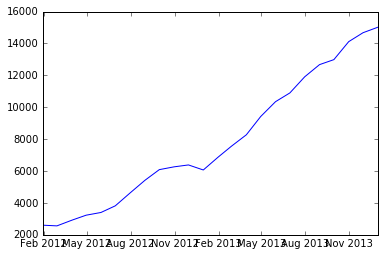

In [14]:
# It's much more convenient to just use pyplot's factory functions...
fig, ax = plt.subplots()

# ax.set_title("Fico Score vs Interest Rate",fontsize=14)
# ax.set_xlabel("FICO score",fontsize=12)
# ax.set_ylabel("Interest rate",fontsize=12)

# plt.scatter(loansData['FICO.Score'],loansData['Interest.Rate'], c='red')

plt.plot(dates, mydf['issue_d'], c = 'blue')
plt.show

In [15]:
myseries = pd.Series(loan_count_summary[:1], index=dates)

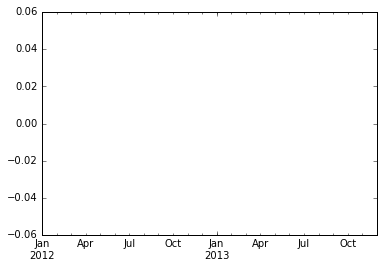

In [16]:
myseries.plot()

In [17]:
loan_count_summary[:1]

Series([], Name: issue_d, dtype: int64)

In [18]:
loan_count_summary

201201     2602
201202     2560
201203     2914
201204     3230
201205     3400
201206     3817
201207     4627
201208     5419
201209     6087
201210     6263
201211     6382
201212     6066
201301     6872
201302     7561
201303     8273
201304     9419
201305    10350
201306    10899
201307    11910
201308    12674
201309    12987
201310    14115
201311    14676
201312    15020
Name: issue_d, dtype: int64

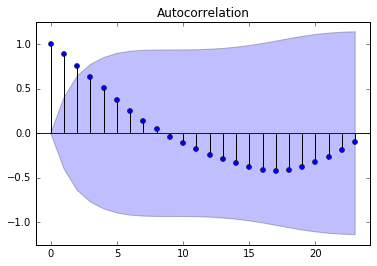

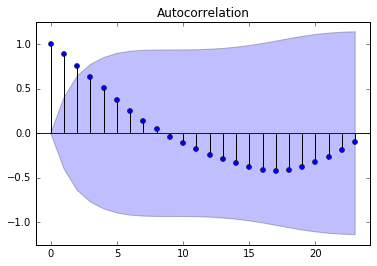

In [21]:
statsmodels.api.graphics.tsa.plot_acf(loan_count_summary)

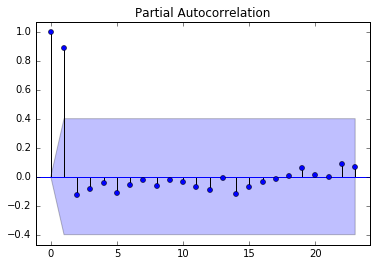

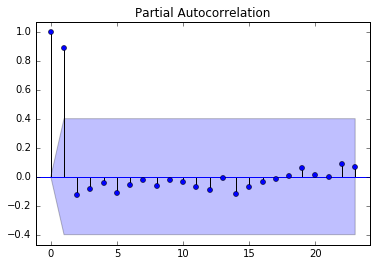

In [22]:
statsmodels.api.graphics.tsa.plot_pacf(loan_count_summary)